<a href="https://colab.research.google.com/github/KhmAsif/IMSE441S2025/blob/main/Linear_Regression_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

#statistic
import scipy as scipy
from scipy import stats
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
#from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



# Data

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/KhmAsif/IMSE441S2025/refs/heads/main/Oxygen%20purity.csv')
data.head(5)


,obs,hydrocarbon,purity
0,1,0.99,90.01
1,2,1.02,89.05
2,3,1.15,91.43
3,4,1.29,93.74
4,5,1.46,96.73


In [ ]:
x = data[['hydrocarbon']]
y= data['purity']


# Normality Check

In [ ]:
%pip install pingouin
import pingouin as pg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 5.4 MB/s eta 0:00:00


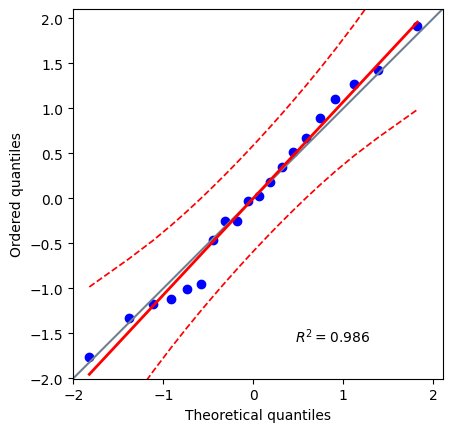

In [ ]:
pg.qqplot(x)
plt.show()

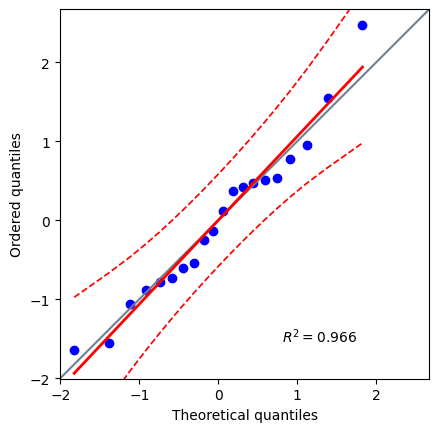

In [ ]:
pg.qqplot(y)
plt.show()

# **Regression: Method 1**

In [ ]:
model_1 = lm.LinearRegression()
model_1.fit(x,y)

LinearRegression()

In [ ]:
print('Coefficients: ', model_1.coef_)
print("y-intercept ", model_1.intercept_)

Coefficients:  [14.94747973]
y-intercept  74.28331424039479


#**y= 74.283 + 14.947 *x**

In [ ]:
y_pred = model_1.predict(x)
y_pred

array([89.08131918, 89.52974357, 91.47291593, 93.56556309, 96.10663465,
       94.61188668, 87.28762161, 92.66871431, 97.45190783, 95.20978587,
       92.07081512, 91.47291593, 88.93184438, 89.38026877, 90.87501674,
       92.22028992, 93.1171387 , 94.01398749, 95.65821026, 88.48341999])

In [ ]:
print("mean square error: ", mean_squared_error(y,y_pred))

mean square error:  1.0624908437610157


In [ ]:
r_sq = model_1.score(x, y)
r_sq

0.8774357051715553

# **Regression: Method 2**

In [ ]:
import statsmodels.api as sm

In [ ]:
x = sm.add_constant(x)
model_2 = sm.OLS(y, x).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 purity   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     128.9
Date:                Thu, 24 Apr 2025   Prob (F-statistic):           1.23e-09
Time:                        18:53:27   Log-Likelihood:                -28.985
No. Observations:                  20   AIC:                             61.97
Df Residuals:                      18   BIC:                             63.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          74.2833      1.593     46.617      

# **Residual analysis: Model Validation**


In [ ]:
residual = y - y_pred
residual

,purity
0,0.928681
1,-0.479744
2,-0.042916
3,0.174437
4,0.623365
5,-0.161887
6,0.302378
7,-0.898714
8,1.968092
9,-1.559786


In [ ]:
res_squared = residual*residual
sse= res_squared.sum()
sse

np.float64(21.24981687522031)

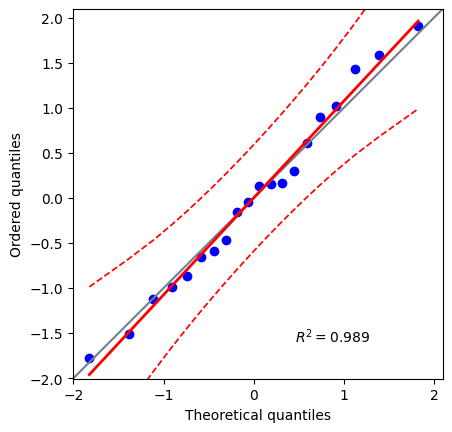

In [ ]:
pg.qqplot(residual)
plt.show()

# **Scatterplot: Model Validation**

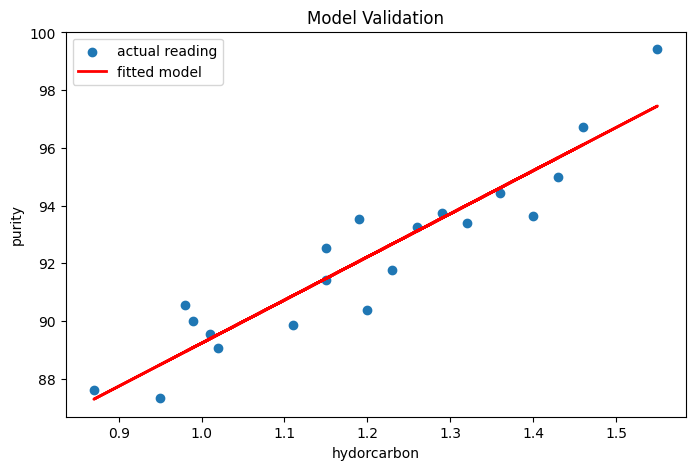

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(x['hydrocarbon'],y)
plt.plot(x['hydrocarbon'], y_pred, linewidth=2, color='red')
plt.xlabel('hydorcarbon')
plt.ylabel('purity')
plt.legend(['actual reading', 'fitted model'])
plt.title('Model Validation')
plt.show()

#**Residual plot: Model Validation**

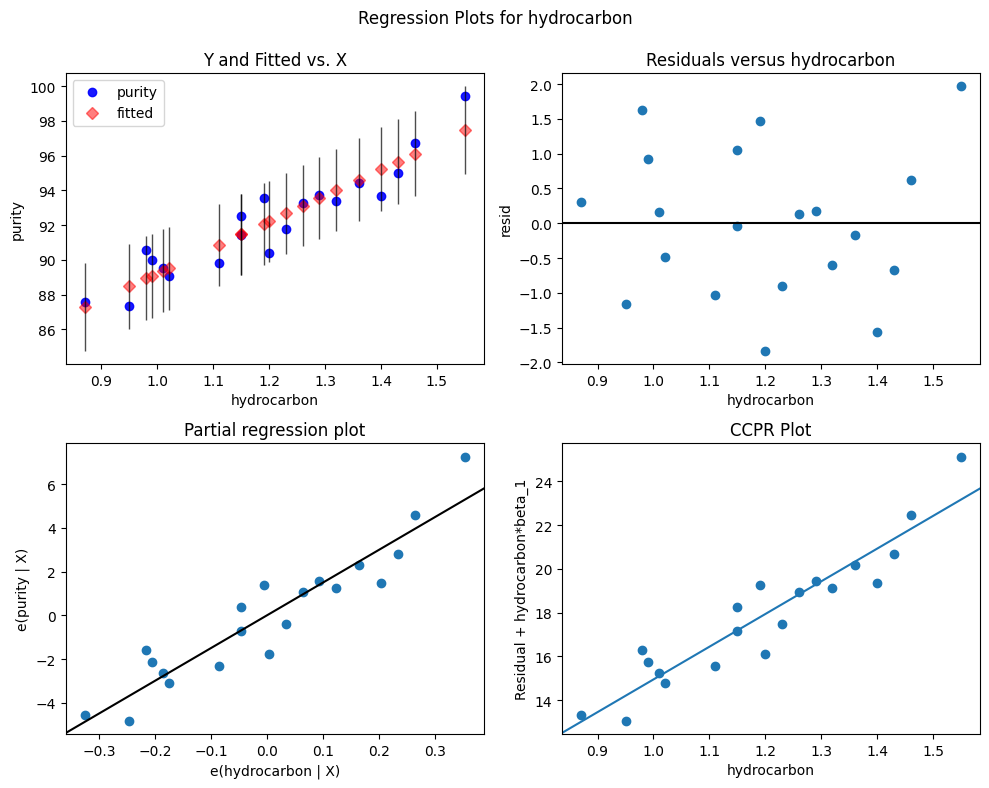

In [ ]:
fig = plt.figure(figsize=(10,8))
sm.graphics.plot_regress_exog(model_2, 'hydrocarbon',fig=fig)
plt.show()

# **Multiple Linear Regression**

# **Wine quality Data from textbook**

In [ ]:
data2=pd.read_csv('https://raw.githubusercontent.com/KhmAsif/IMSE441S2025/refs/heads/main/Wine%20Quality%20Data.csv')
data2.head(10)

,Observation,Clarity,Aroma,Body,Flavor,Oakness,Quality
0,1,1.0,3.3,2.8,3.1,4.1,9.8
1,2,1.0,4.4,4.9,3.5,3.9,12.6
2,3,1.0,3.9,5.3,4.8,4.7,11.9
3,4,1.0,3.9,2.6,3.1,3.6,11.1
4,5,1.0,5.6,5.1,5.5,5.1,13.3
5,6,1.0,4.6,4.7,5.0,4.1,12.8
6,7,1.0,4.8,4.8,4.8,3.3,12.8
7,8,1.0,5.3,4.5,4.3,5.2,12.0
8,9,1.0,4.3,4.3,3.9,2.9,13.6
9,10,1.0,4.3,3.9,4.7,3.9,13.9


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Observation  38 non-null     int64  
 1   Clarity      38 non-null     float64
 2   Aroma        38 non-null     float64
 3   Body         38 non-null     float64
 4   Flavor       38 non-null     float64
 5   Oakness      38 non-null     float64
 6   Quality      38 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 2.2 KB


In [ ]:
x1 = data2[['Clarity',	'Aroma',	'Body',	'Flavor',	'Oakness']]
y1= data2['Quality']

In [ ]:
import statsmodels.api as sm

In [ ]:
x1 = sm.add_constant(x1)
model_3 = sm.OLS(y1, x1).fit()
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                Quality   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     16.51
Date:                Thu, 24 Apr 2025   Prob (F-statistic):           4.70e-08
Time:                        19:04:12   Log-Likelihood:                -56.378
No. Observations:                  38   AIC:                             124.8
Df Residuals:                      32   BIC:                             134.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9969      2.232      1.791      0.0

# We can see from Model 3 summary that clarity and Body p value is much higher. So we can say that clarity and Body amount don't have significant effect on the wine quality. Aroma does have a higer p value than alpha but still it is pretty close to 0.05. So, We can remodel the equation with only Aroma, FLavor and oakness as independent variables

In [ ]:
x2= data2[['Aroma', 'Flavor',	'Oakness']]
y2= data2['Quality']

In [ ]:
x2 = sm.add_constant(x2)
model_4 = sm.OLS(y2, x2).fit()
print(model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                Quality   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     26.92
Date:                Thu, 24 Apr 2025   Prob (F-statistic):           4.20e-09
Time:                        19:06:25   Log-Likelihood:                -57.489
No. Observations:                  38   AIC:                             123.0
Df Residuals:                      34   BIC:                             129.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4672      1.333      4.852      0.0

In [ ]:
x3= data2[['Aroma', 'Flavor']]
y3= data2['Quality']

In [ ]:
x3 = sm.add_constant(x3)
model_5 = sm.OLS(y3, x3).fit()
print(model_5.summary())

                            OLS Regression Results                            
Dep. Variable:                Quality   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     33.75
Date:                Thu, 24 Apr 2025   Prob (F-statistic):           6.81e-09
Time:                        19:07:20   Log-Likelihood:                -60.188
No. Observations:                  38   AIC:                             126.4
Df Residuals:                      35   BIC:                             131.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3462      1.009      4.307      0.0

# **Scatterplot: Model Validation**

# **Equation: Quality= 6.4672+ 0.58 * Aroma+ 1.1997 * Flavor -0.6023* Oakness**

In [ ]:
y2_pred = model_4.predict(x2)

In [ ]:
residual_2=y2-y2_pred

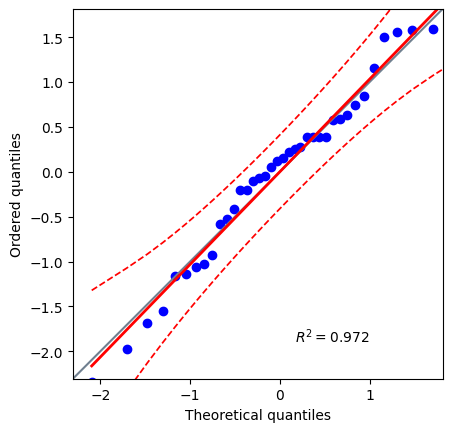

In [ ]:
pg.qqplot(residual_2)
plt.show()

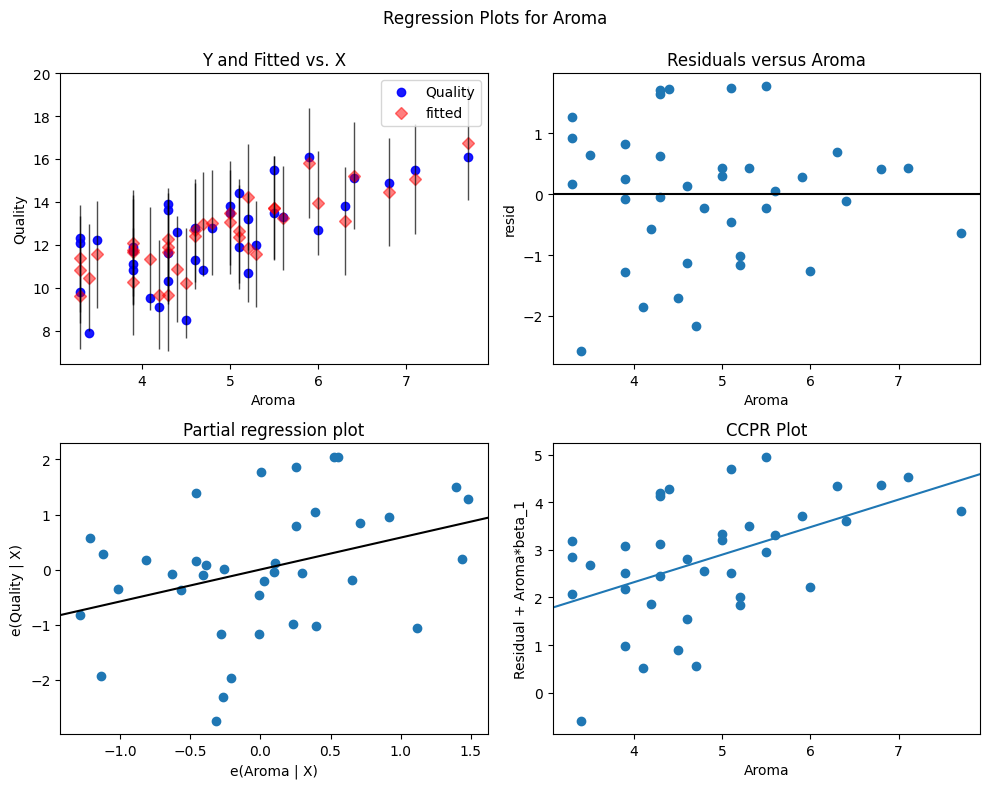

In [ ]:
fig = plt.figure(figsize=(10,8))
sm.graphics.plot_regress_exog(model_4, 'Aroma',fig=fig)
plt.show()

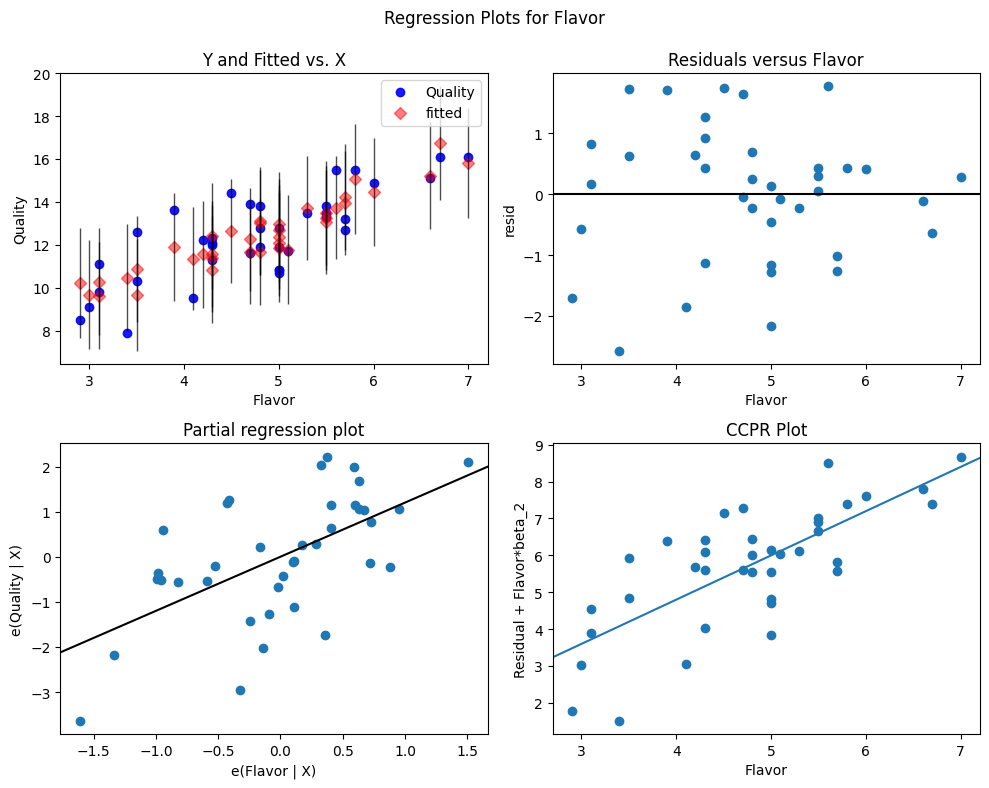

In [ ]:
fig = plt.figure(figsize=(10,8))
sm.graphics.plot_regress_exog(model_4, 'Flavor',fig=fig)
plt.show()

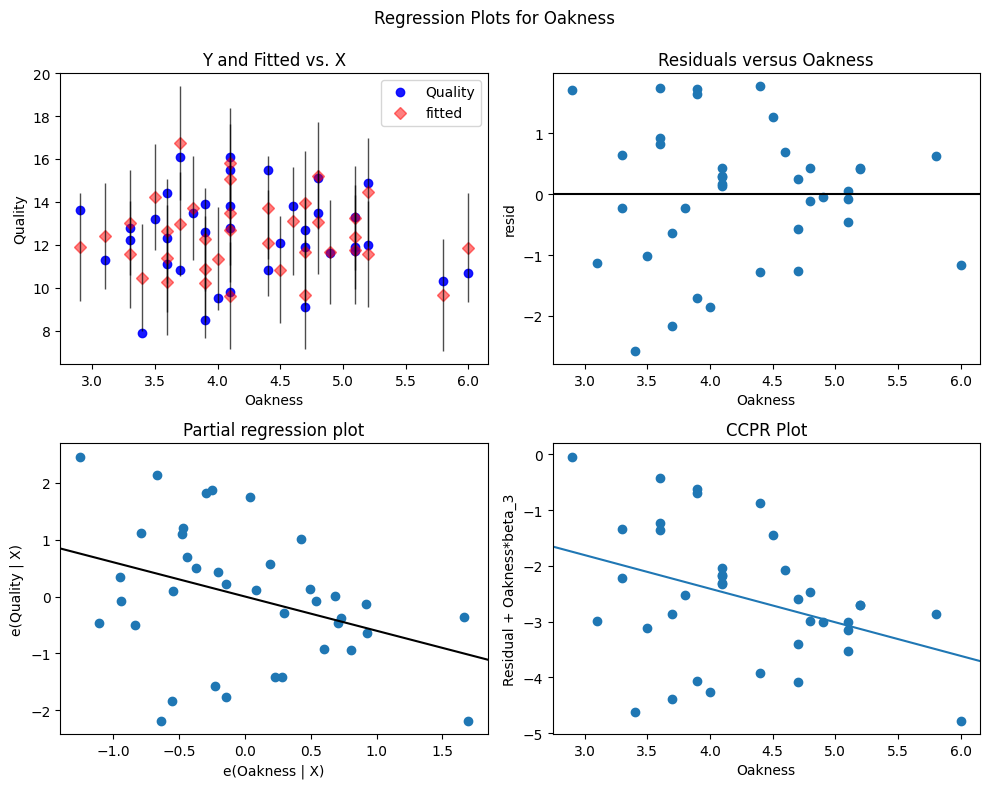

In [ ]:
fig = plt.figure(figsize=(10,8))
sm.graphics.plot_regress_exog(model_4, 'Oakness',fig=fig)
plt.show()